In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset = df.iloc[:,:-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
dataset_norm = scaler.fit_transform(dataset)
print(dataset_norm[0:5, :])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [5]:
x_train = dataset_norm[0:538,:]
x_test = dataset_norm[538: ,:]

print(x_train.shape)
print(x_test.shape)

(538, 8)
(230, 8)


In [23]:
from sklearn.cluster import KMeans
k = 2
km = KMeans(n_clusters=k,init='random',)
km.fit(x_train)

KMeans(init='random', n_clusters=2)

In [24]:
dato_prueba = x_test[2,:]
dato_prueba =dato_prueba.reshape((1,8))
print(dato_prueba)
prediccion = km.predict(dato_prueba)
print(prediccion)

[[0.47058824 0.50251256 0.60655738 0.4040404  0.25413712 0.58718331
  0.24893254 0.36666667]]
[0]


In [25]:
centroides = km.cluster_centers_
print(centroides)

[[0.4372205  0.66484469 0.60761193 0.16787761 0.08449117 0.4838288
  0.17373815 0.42826511]
 [0.12550088 0.57609574 0.53959887 0.22180937 0.09746459 0.46918869
  0.17301522 0.0972752 ]]


## Squared Euclidean Distance

$d(\boldsymbol{x,y})^{2} = \sum_{j=1}^{m}(x_j - y_j)^{2} = \left| \left| \boldsymbol{x - y} \right|\right|_{2}^{2}$

## Sum of Squared Errors (SSE)
$SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} \left| \left|{x^{(i)}-\mu^{(j)}}_2^2\right|\right|_{2}^{2}$



*   $\mu^{(j)}$ es el centroide del cluster $j$.
*   $w^{(i,j)} = 1$ si $x^{(i}$ se esta en el cluster o $w^{(i,j)} = 0$ si no lo esta.   



In [26]:
inercia = km.inertia_
print(inercia)

87.24975655278256


In [10]:
score = km.score(x_train)
print(score)

-87.24975655278254


In [11]:
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='random',
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(x_train)
  inertia.append(km.inertia_)

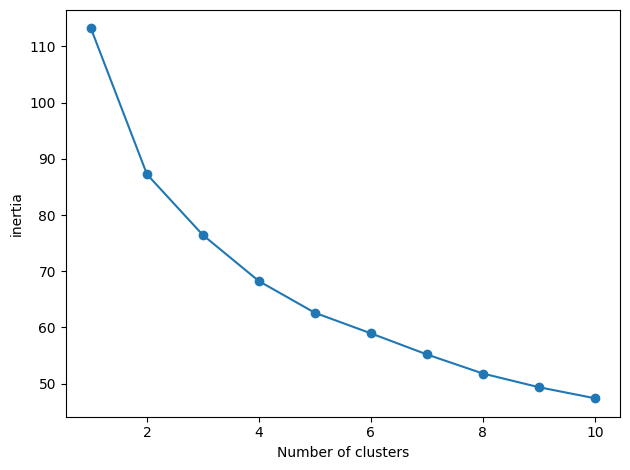

In [12]:
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.tight_layout()
plt.show()

## silhouette analysis

$s^{(i)} = \dfrac{b^{(i)} - a^{(i)}}{max(b^{(i)},a^{(i)})}$



*   $a^{(i)}$: is he average distance between an example, $x^{(i)}$, and all
other points in the same cluster.
*   $b^{(i)}$: is he average distance between an example, $x^{(i)}$, and all examples in the nearest cluster.
*   $s^{(i)}$: silhouette coefficient

In [13]:
k = 2
km = KMeans(n_clusters=k,init='k-means++')
km.fit(x_train)

KMeans(n_clusters=2)

In [14]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
y_km = km.predict(x_train)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

In [15]:
silhouette_vals = silhouette_samples(x_train, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

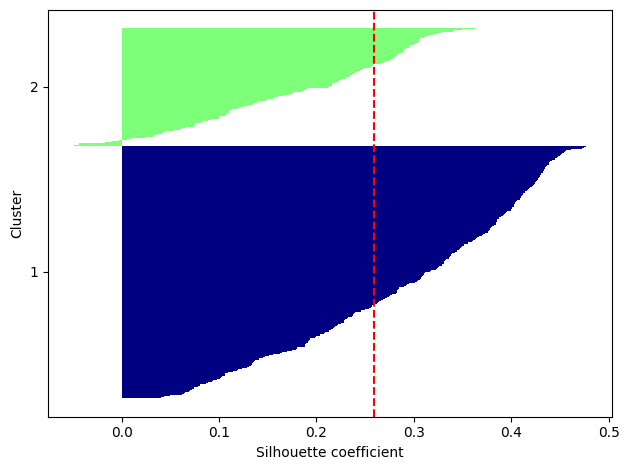

In [16]:
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
              color="red",
              linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()